In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Some helper functions for plottinf and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')
    

def display(m, b, color = 'g--'):
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

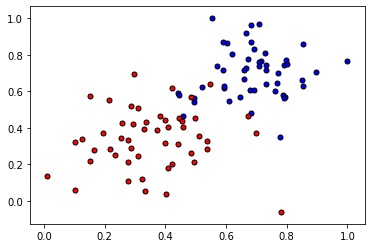

In [4]:
## Reading and plotting the data

data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0, 1]])
y = np.array(data[2])
plot_points(X, y)
plt.show()

In [13]:
## Implementing the basic functions

#activations(sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return -y * np.log(output) - (1 - y) * np.log(1 - output)

def update_weights(x, y, weights, bias, lr):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += lr * d_error * x
    bias += lr * d_error
    
    return weights, bias

In [18]:
## Training function

np.random.seed(44)

epochs = 100
lr = 0.01

def train(features, targets, epochs, lr, graph_lines = False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale = 1 / n_features ** .5, size = n_features)
    bias = 0
    
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, lr)
            
            
        #Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            
        #Ploting the solution boudary
        plt.title("Solutions Boundary")
        display(-weights[0] / weights[1], -bias / weights[1], 'black')
        
        #Plotting the data
        plot_points(features, targets)
        plt.show()
        
        #Plotting the error
        plt.title("Error Plot")
        plt.xlabel("Number of epochs")
        plt.ylabel("Error")
        plt.plot(errors)
        plt.show()
    


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4


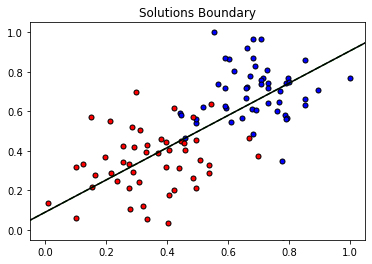

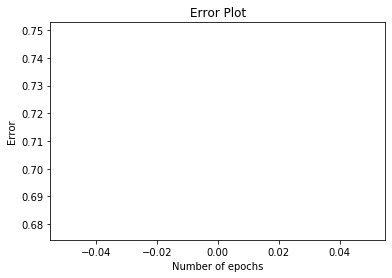

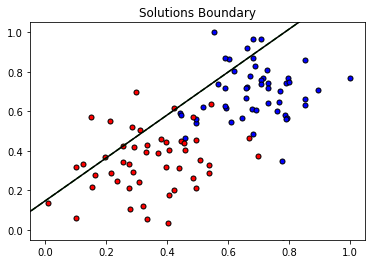

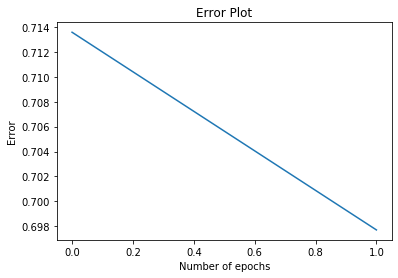

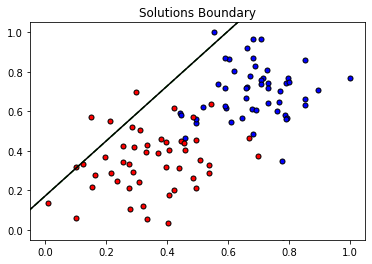

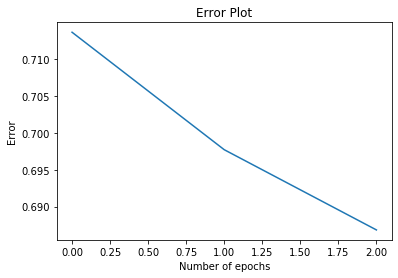

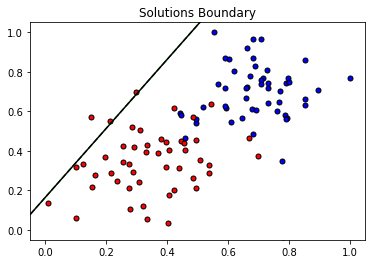

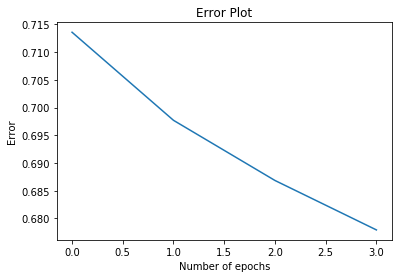

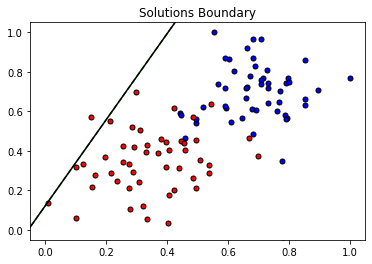

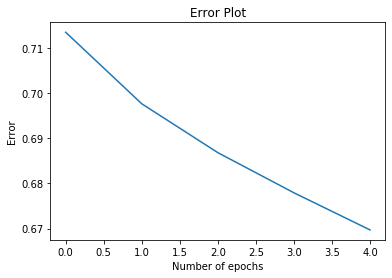

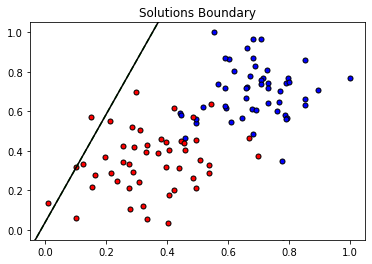

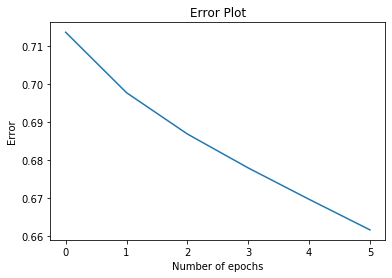

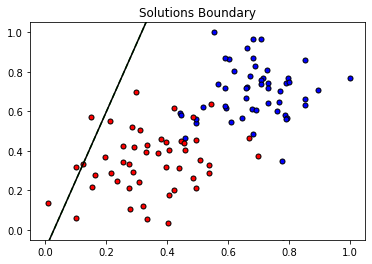

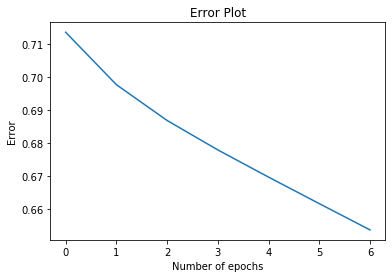

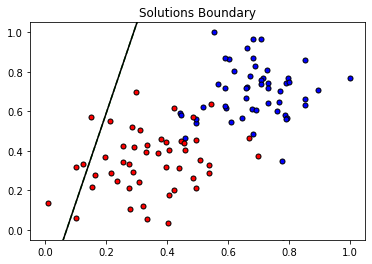

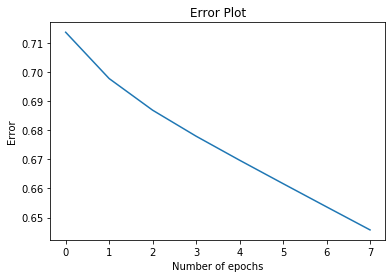

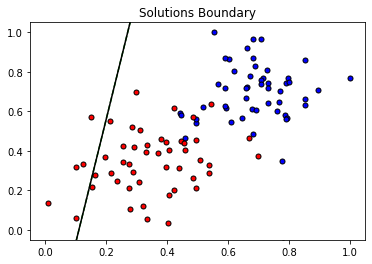

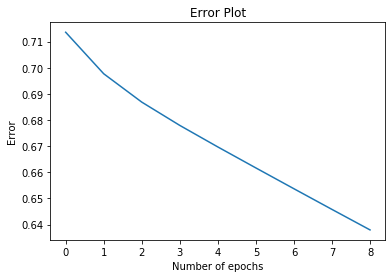

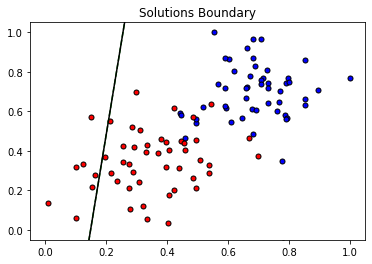

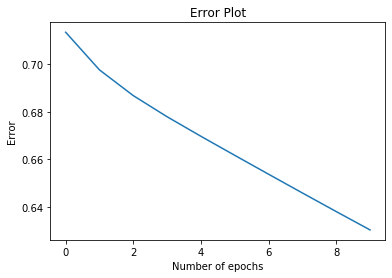


========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59


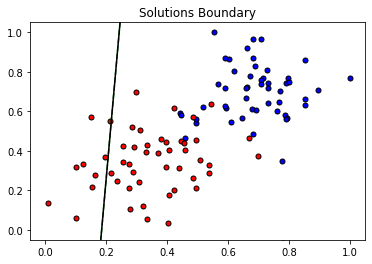

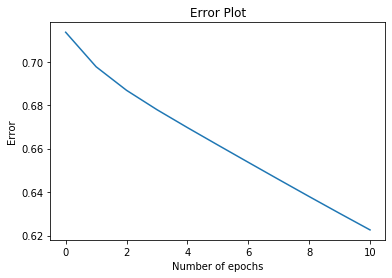

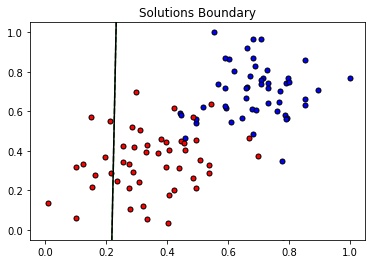

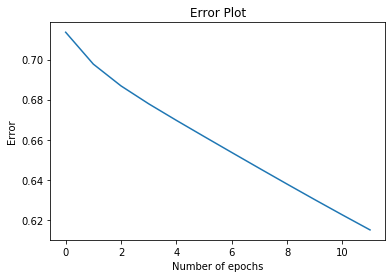

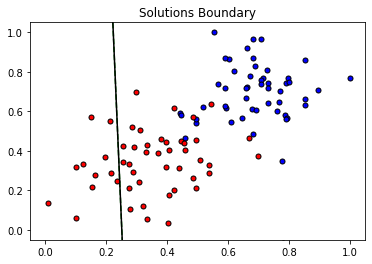

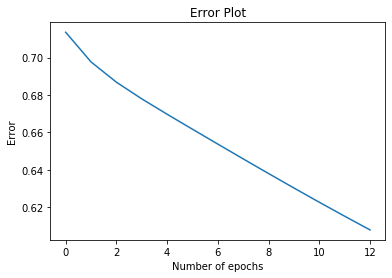

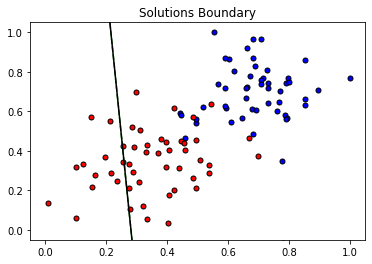

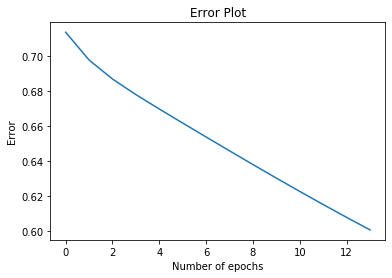

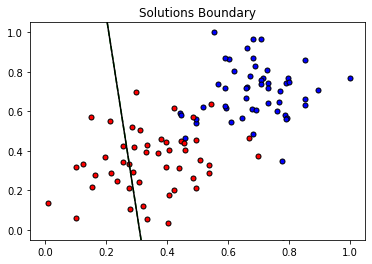

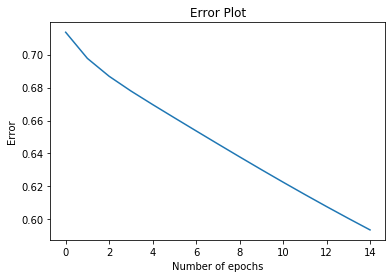

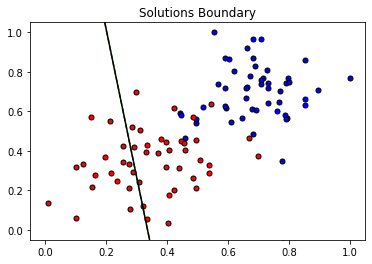

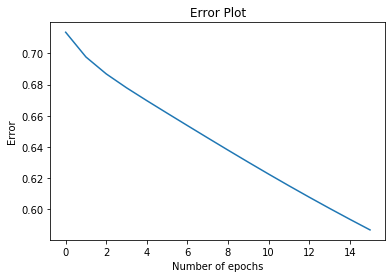

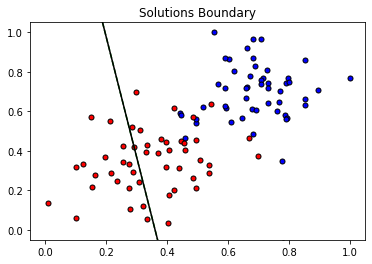

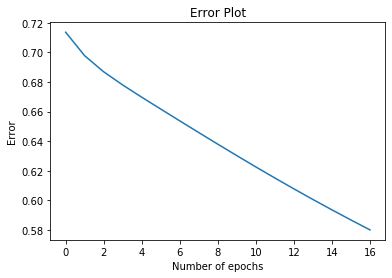

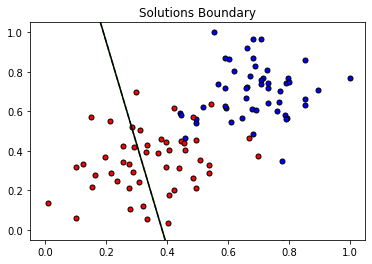

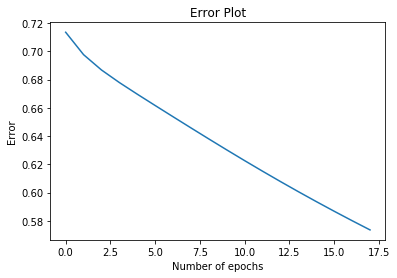

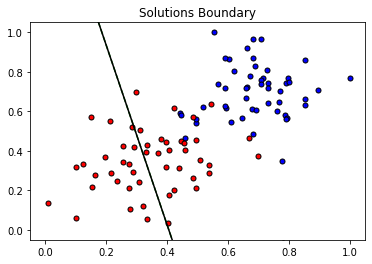

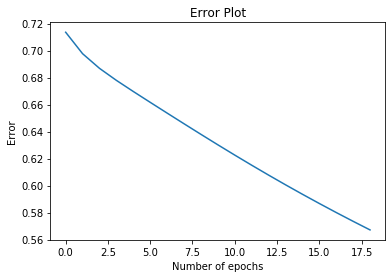

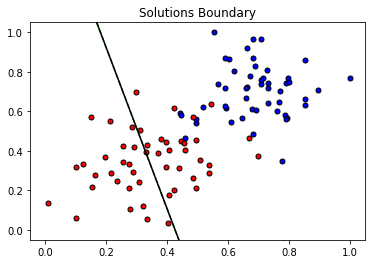

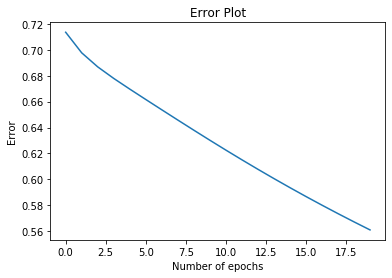


========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74


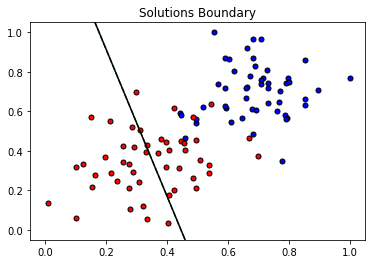

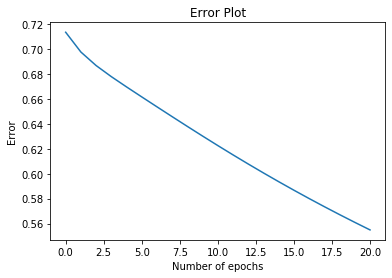

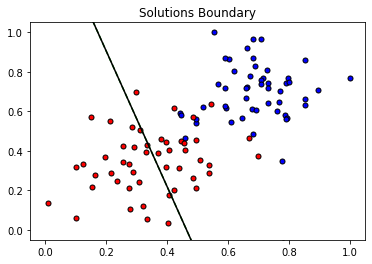

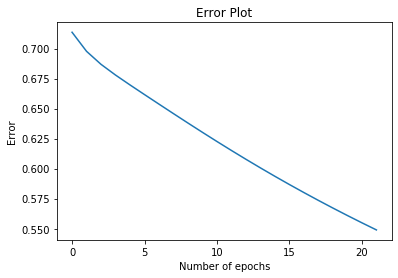

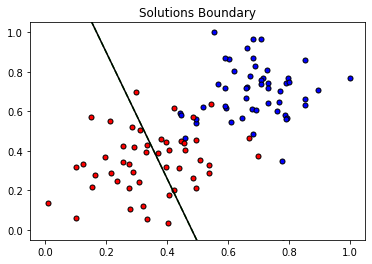

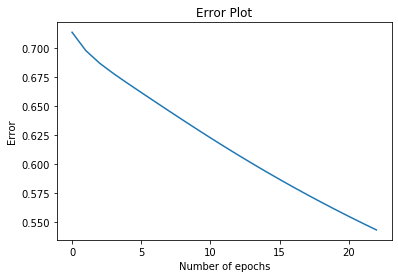

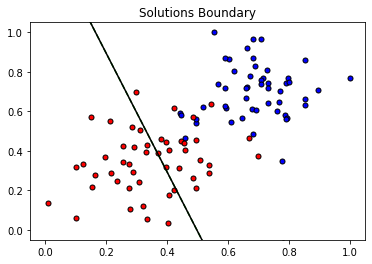

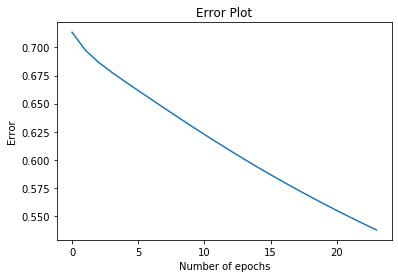

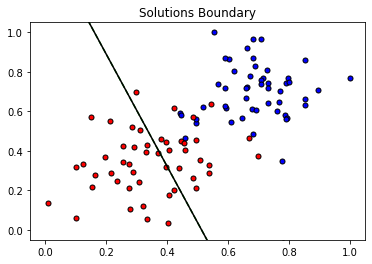

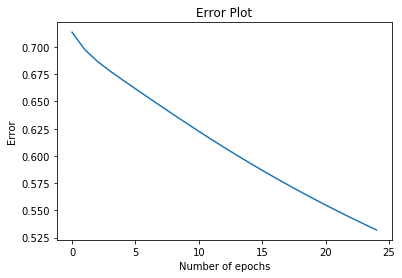

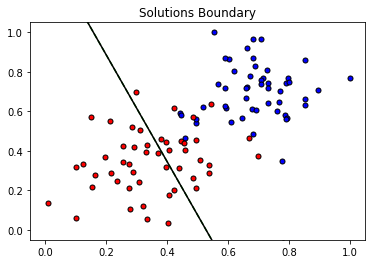

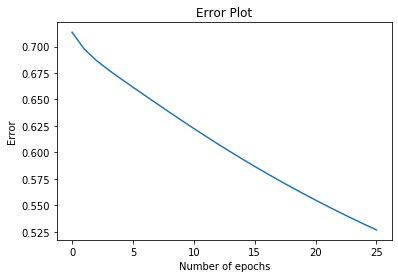

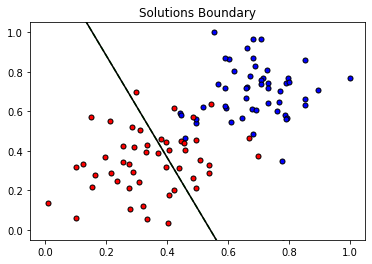

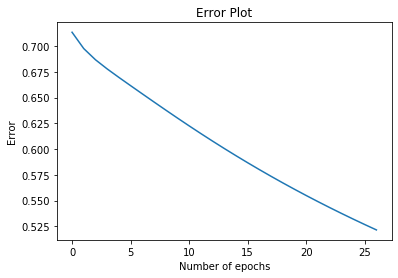

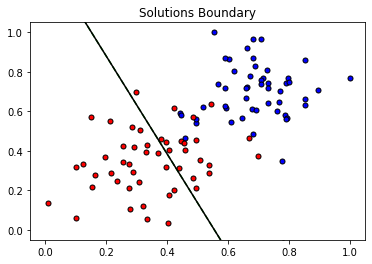

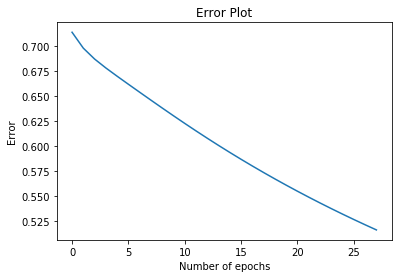

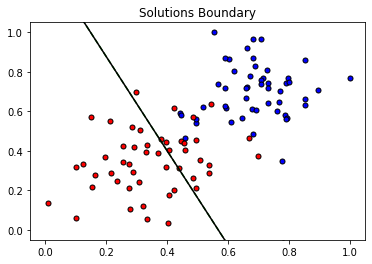

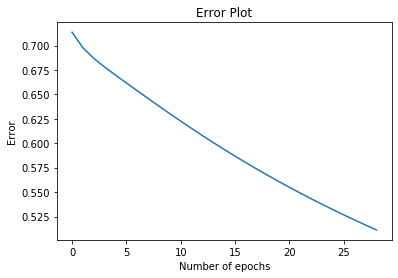

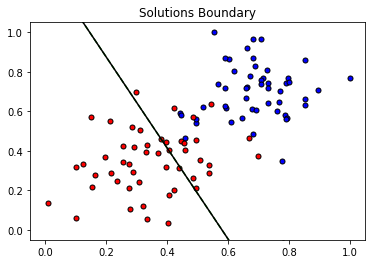

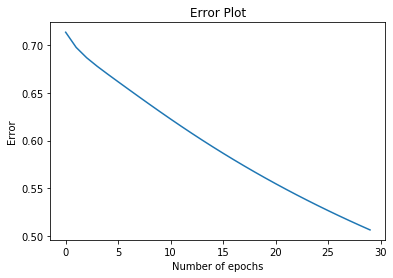


========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84


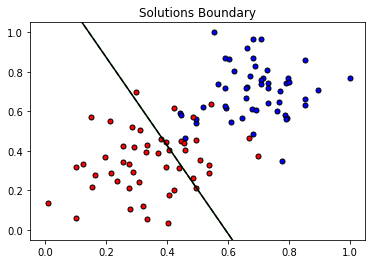

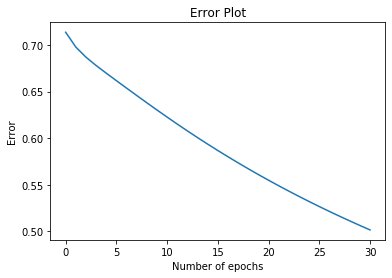

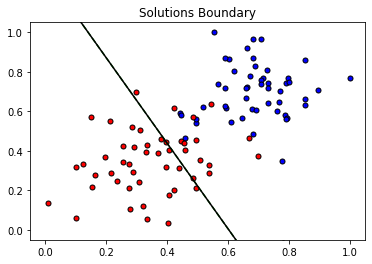

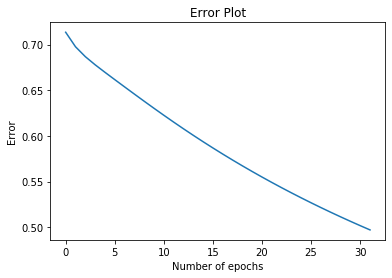

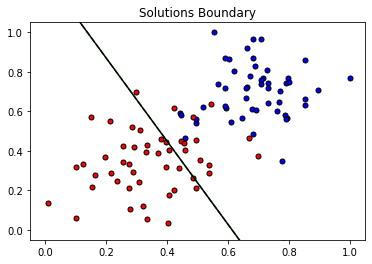

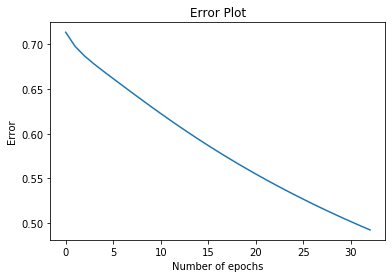

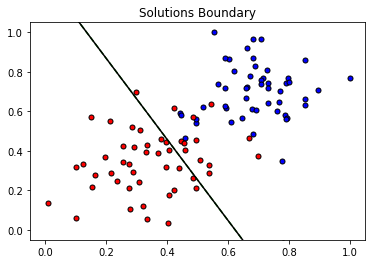

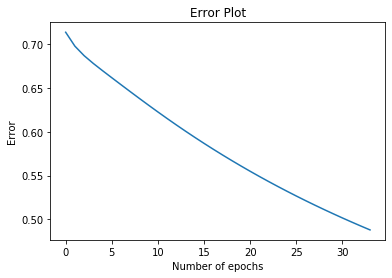

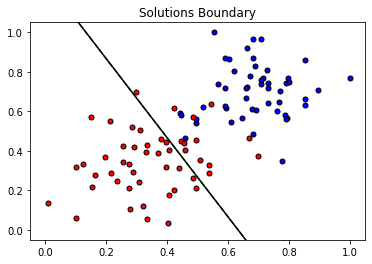

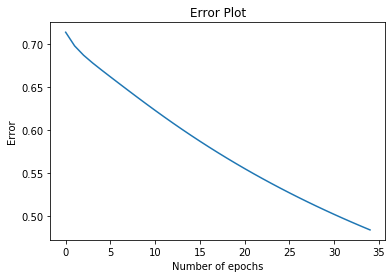

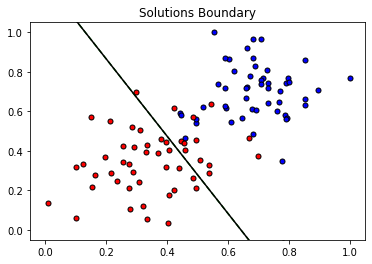

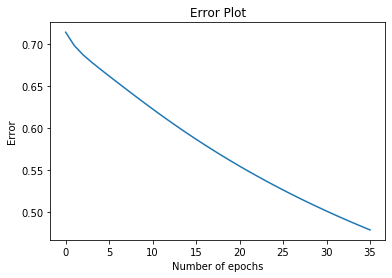

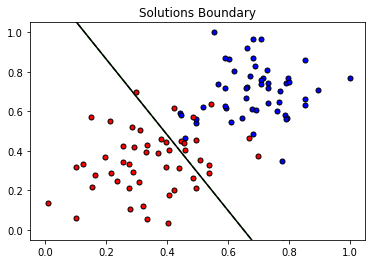

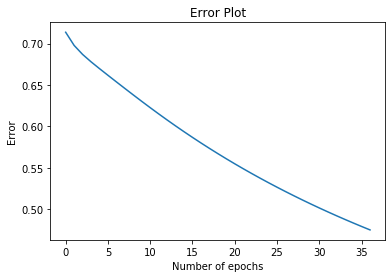

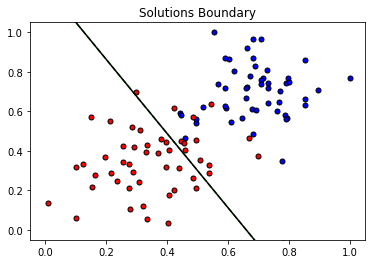

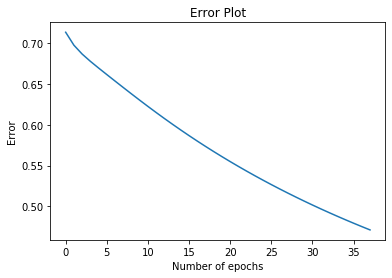

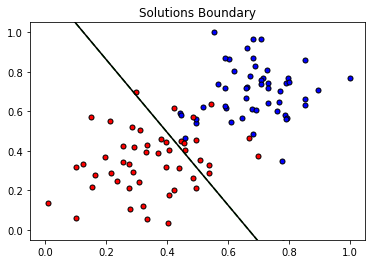

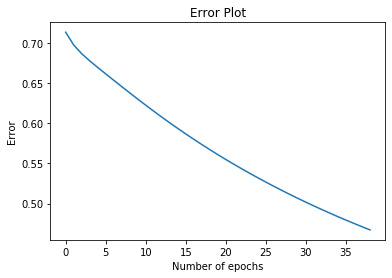

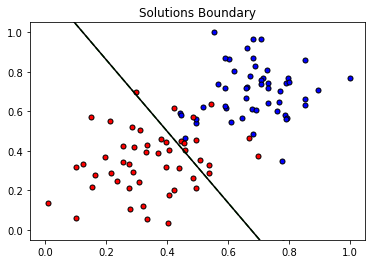

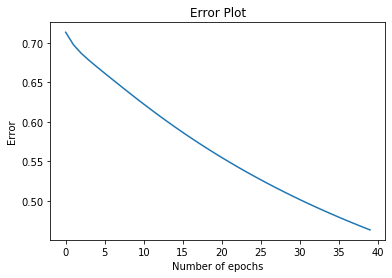


========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86


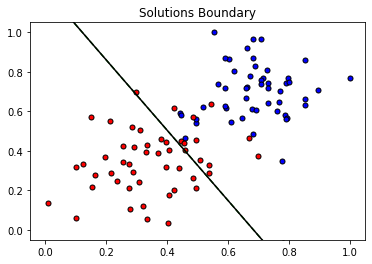

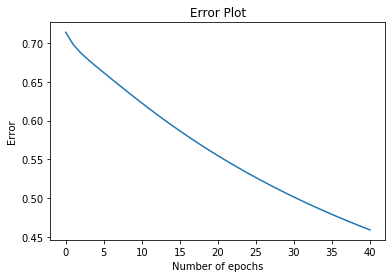

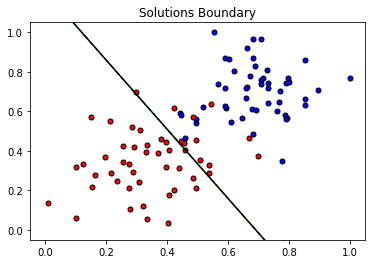

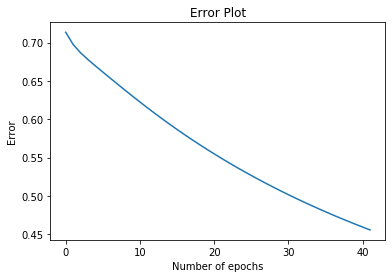

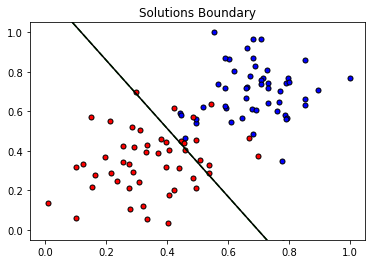

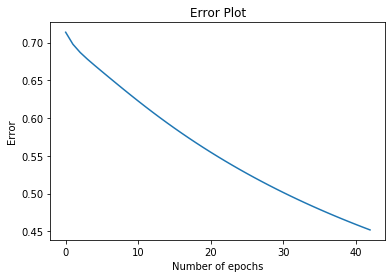

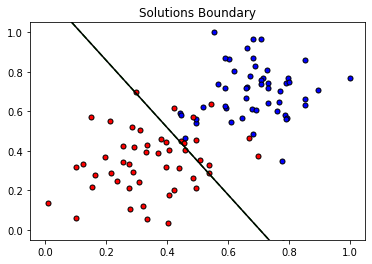

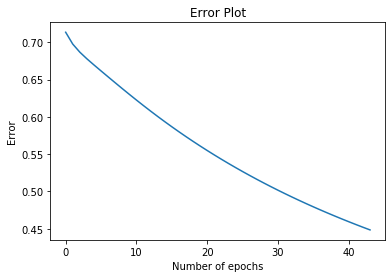

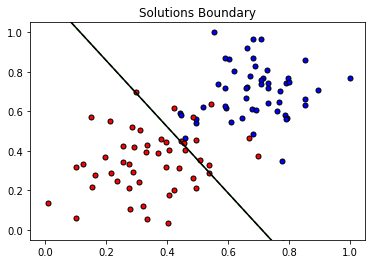

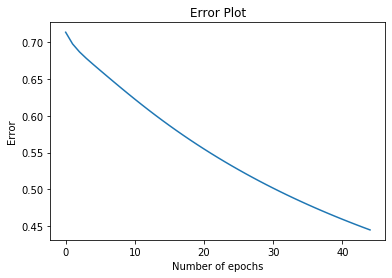

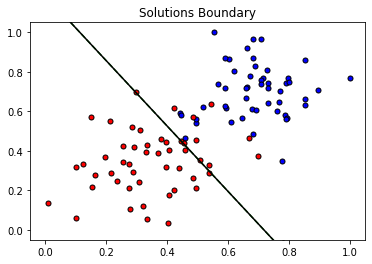

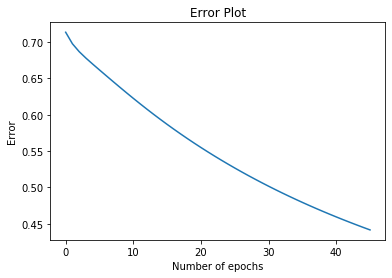

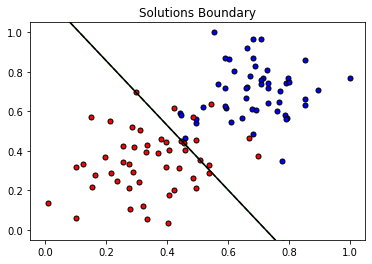

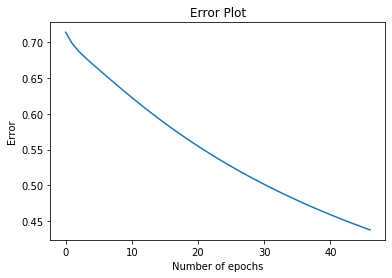

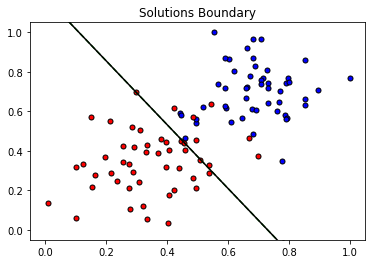

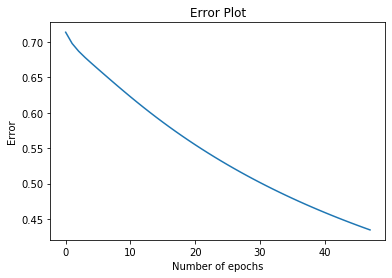

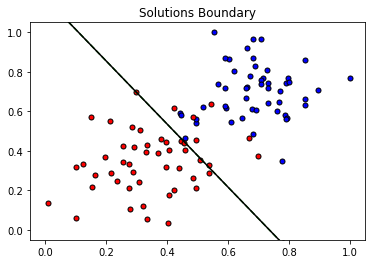

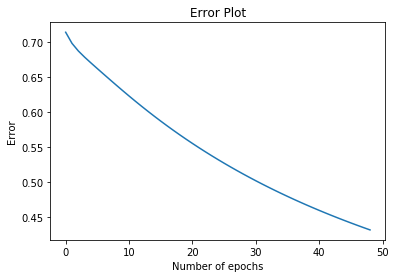

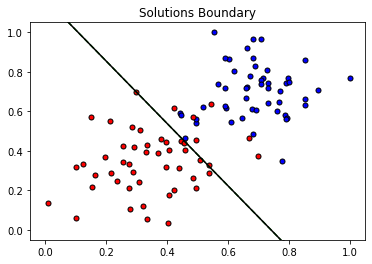

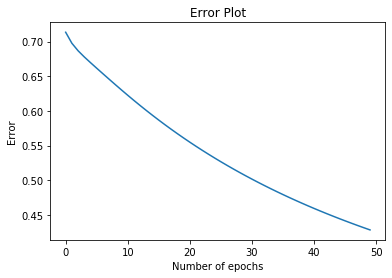


========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93


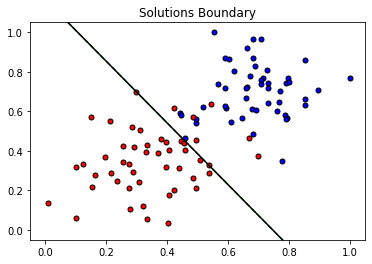

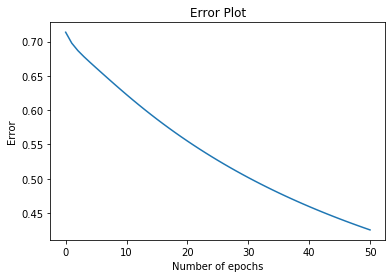

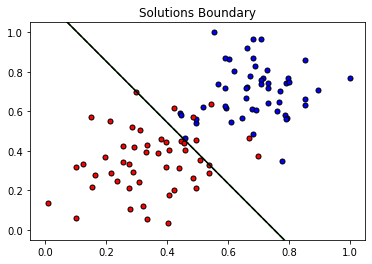

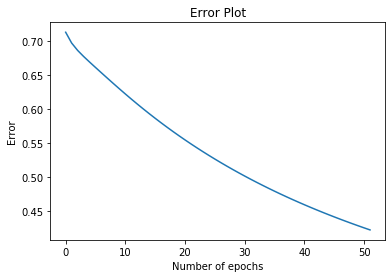

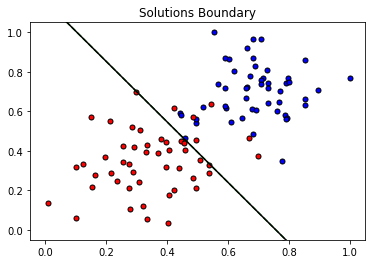

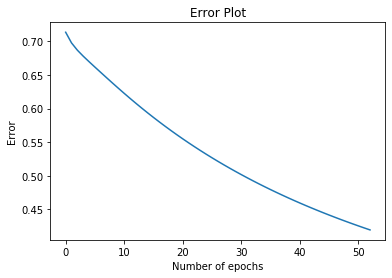

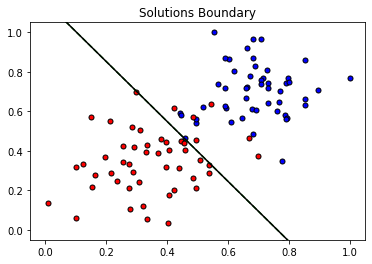

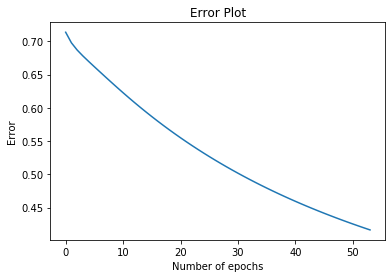

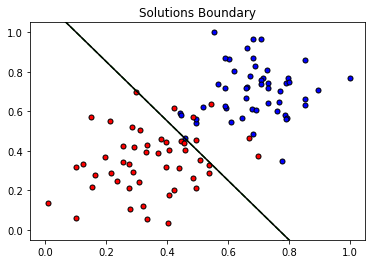

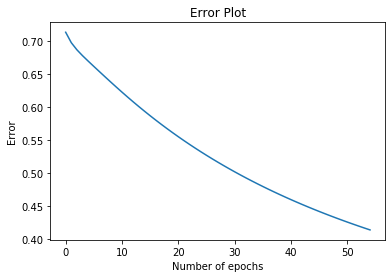

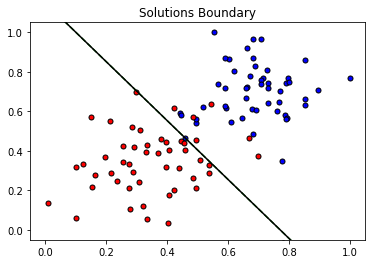

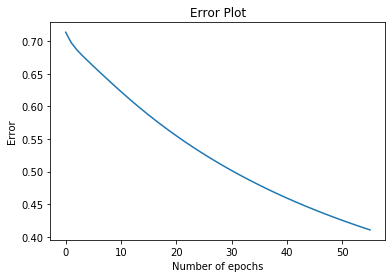

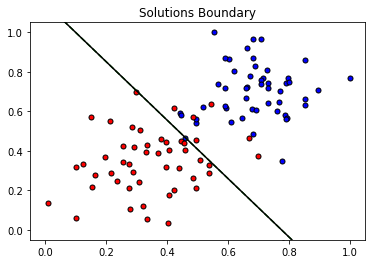

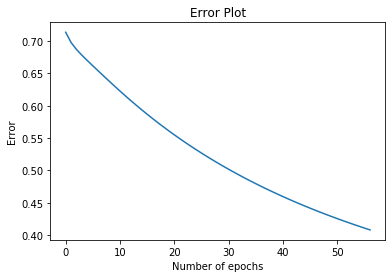

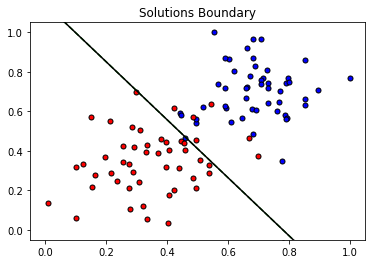

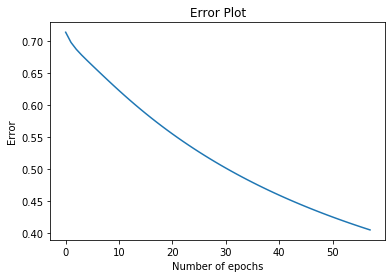

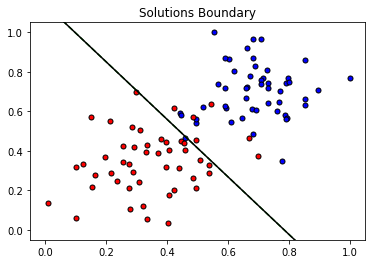

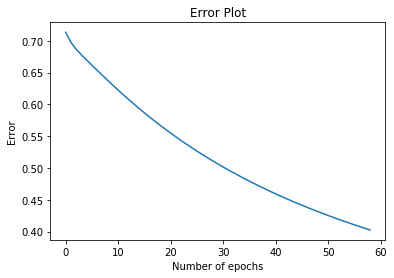

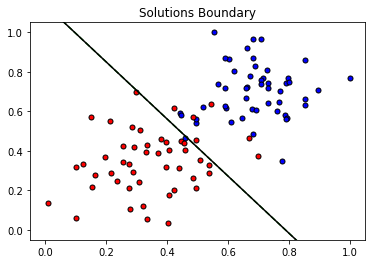

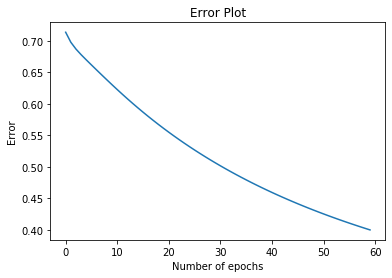


========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93


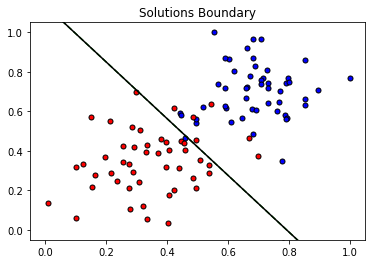

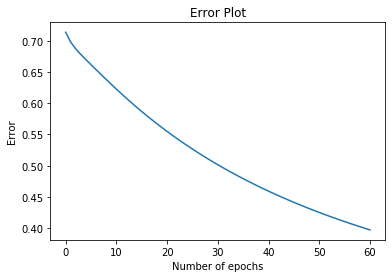

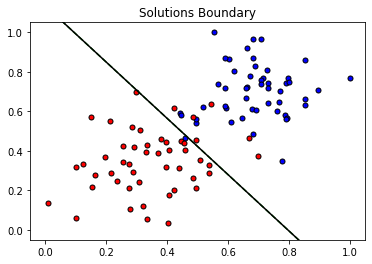

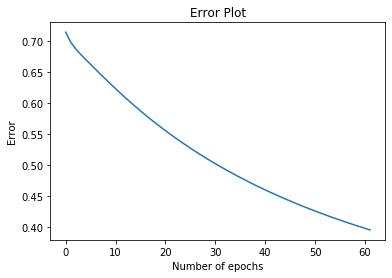

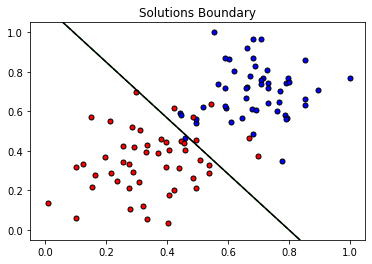

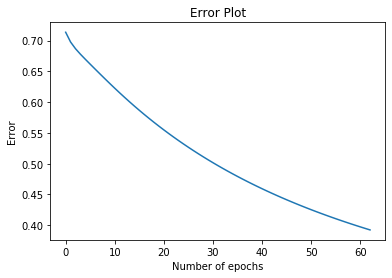

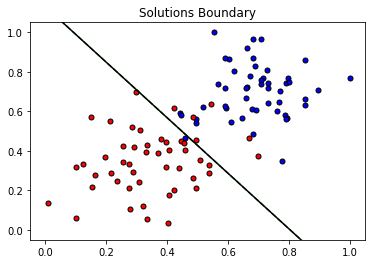

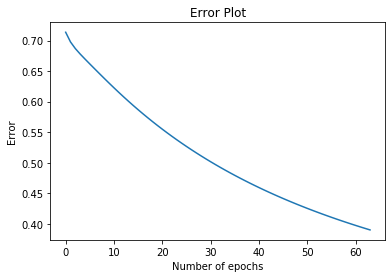

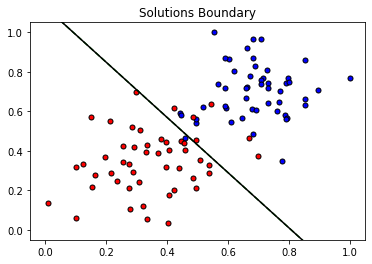

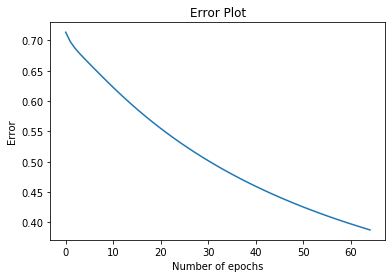

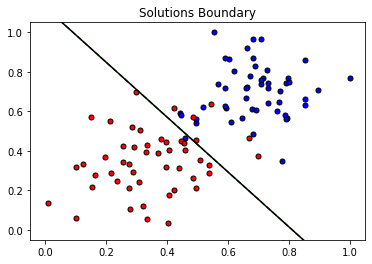

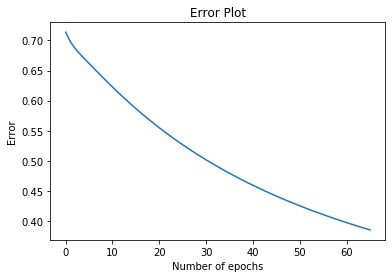

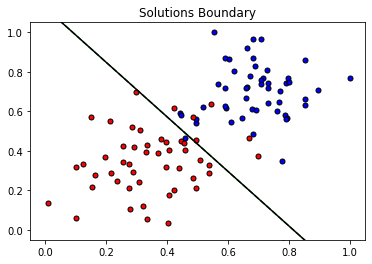

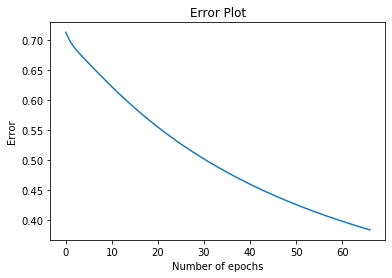

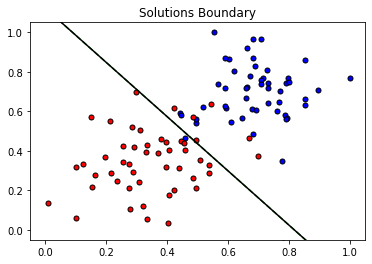

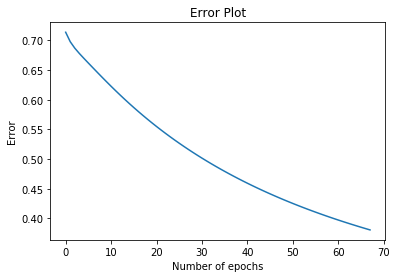

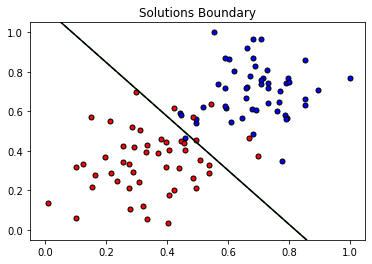

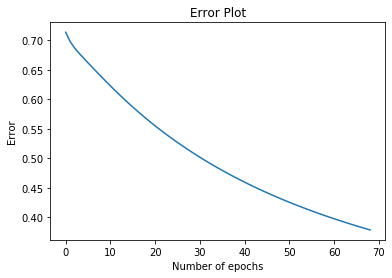

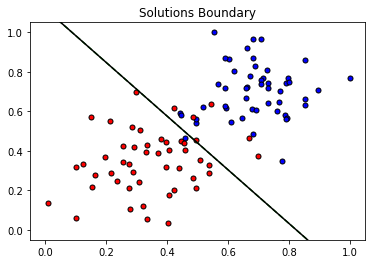

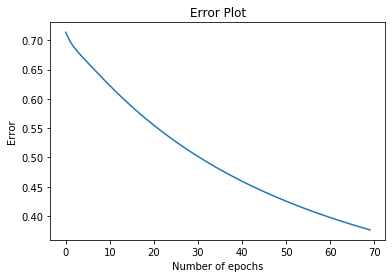


========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93


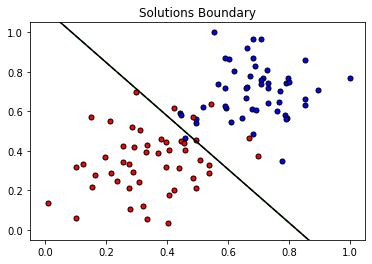

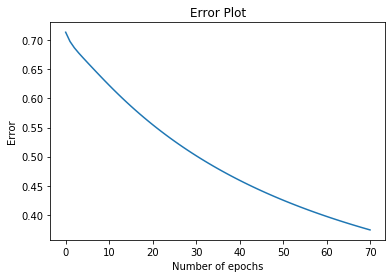

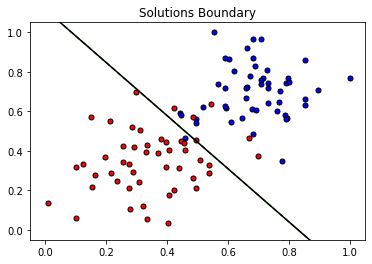

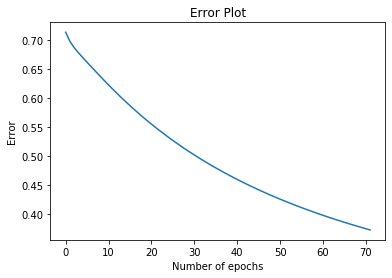

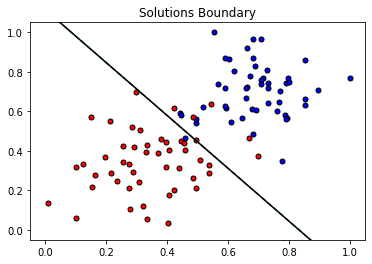

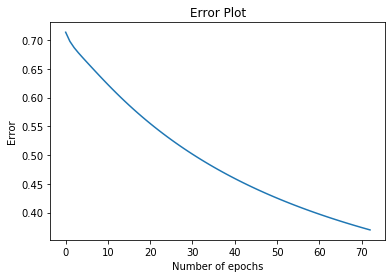

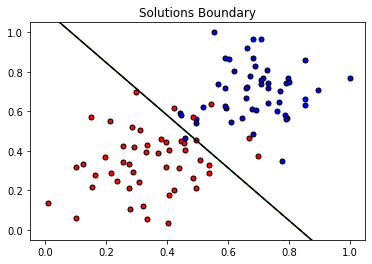

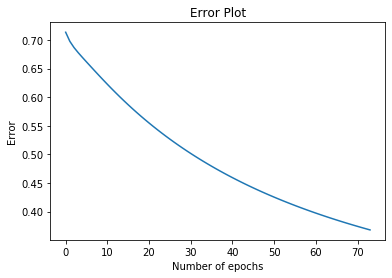

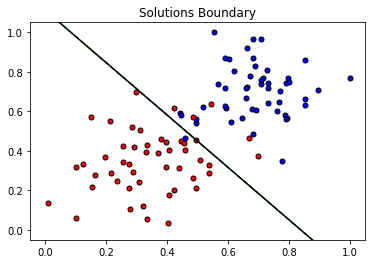

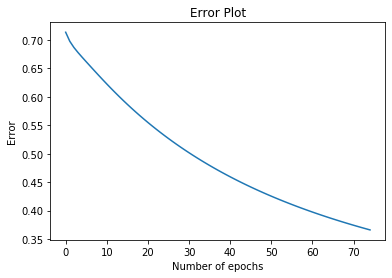

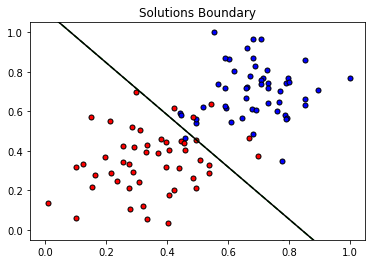

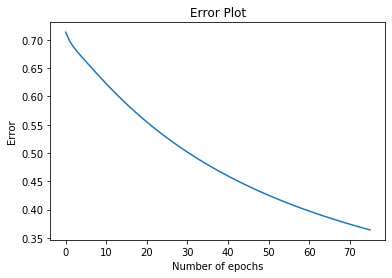

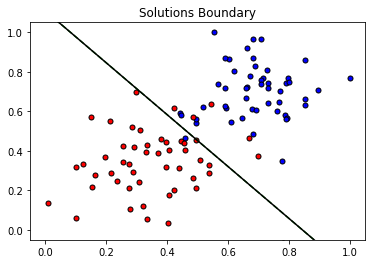

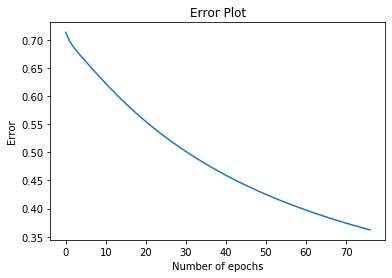

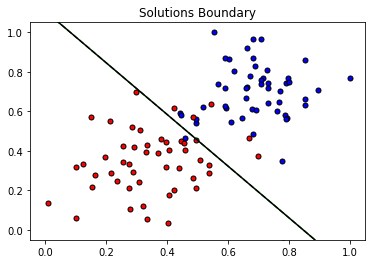

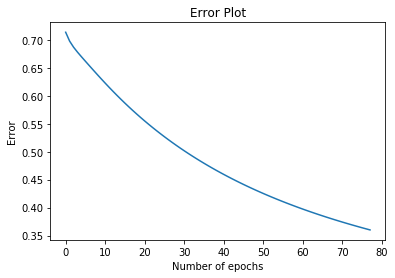

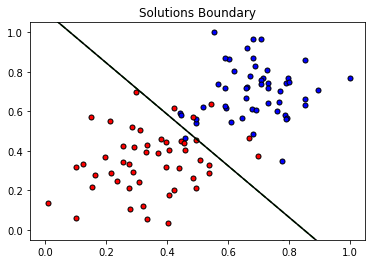

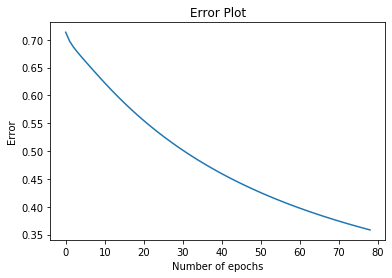

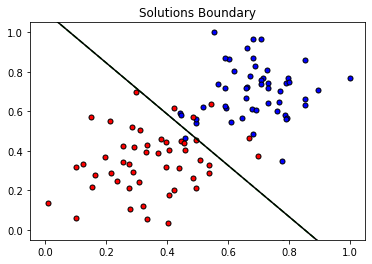

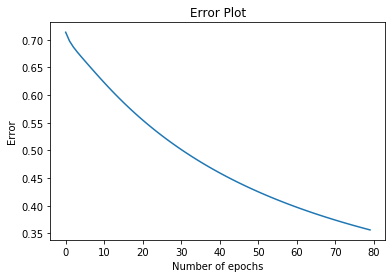


========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94


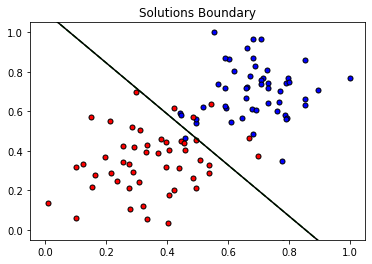

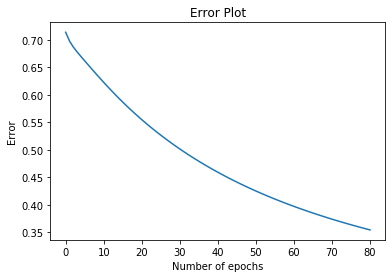

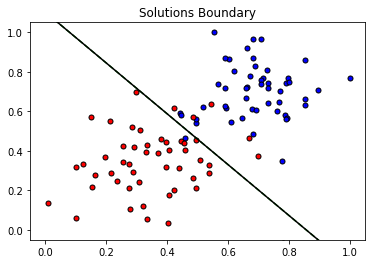

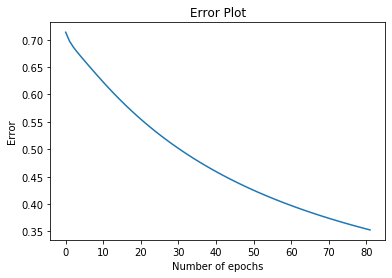

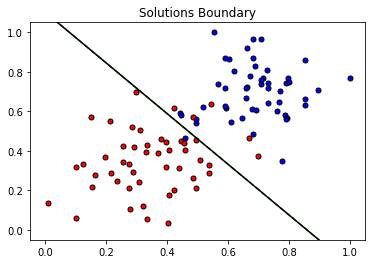

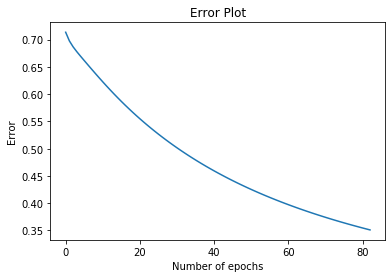

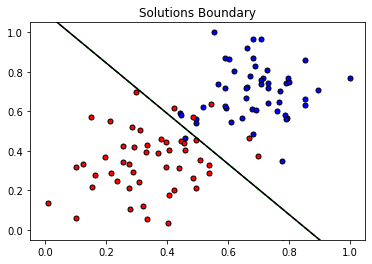

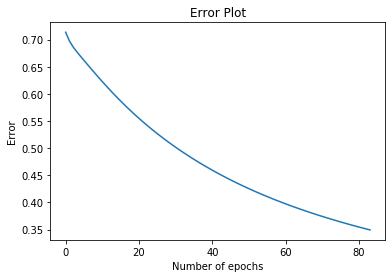

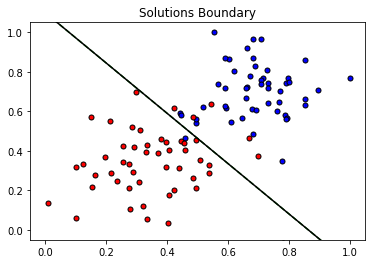

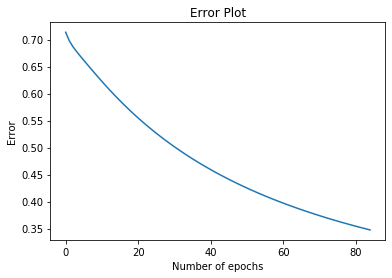

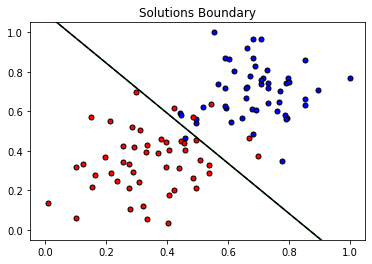

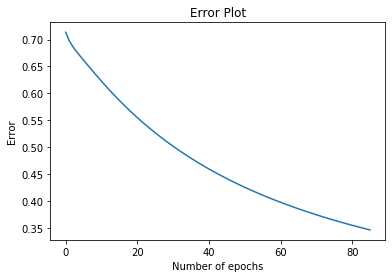

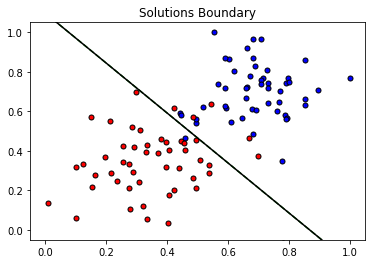

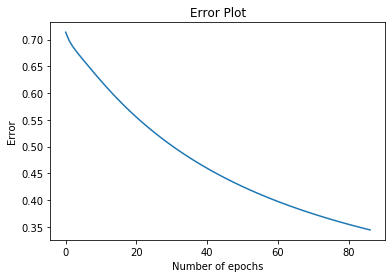

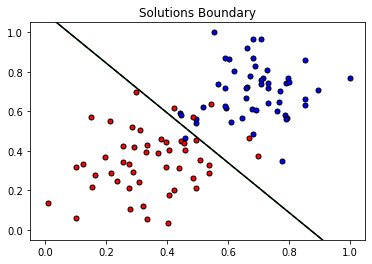

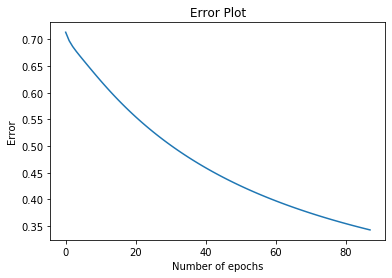

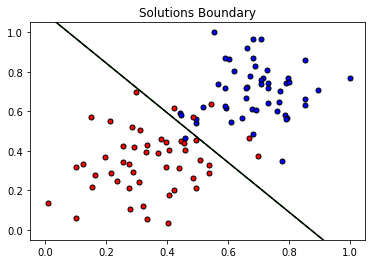

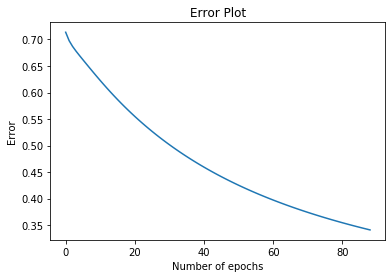

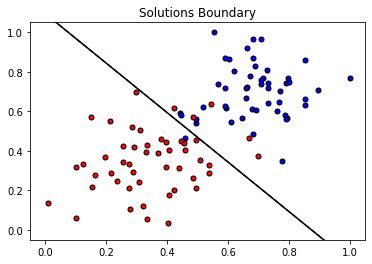

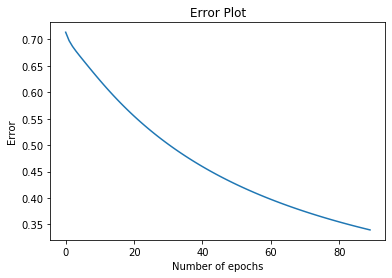


========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


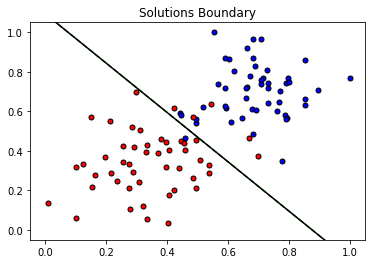

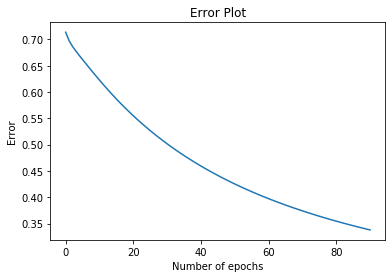

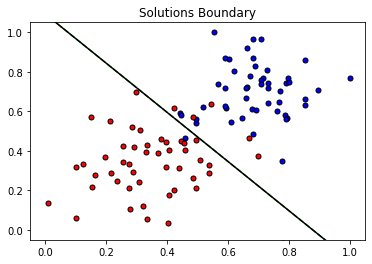

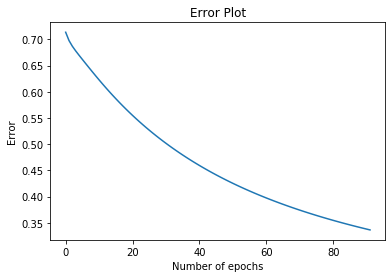

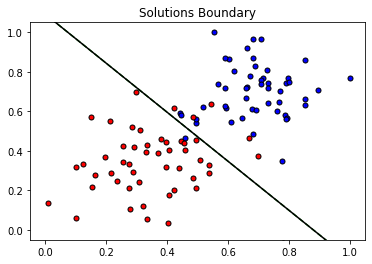

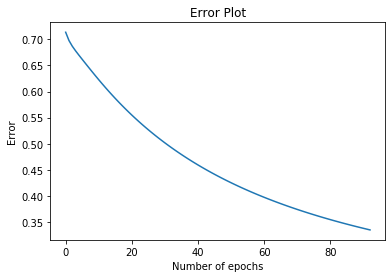

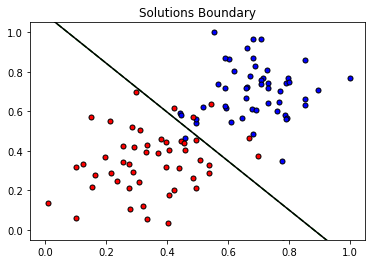

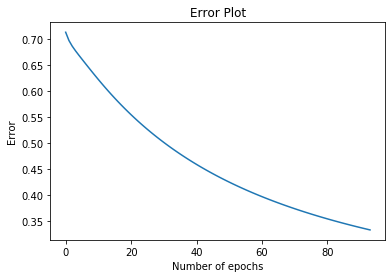

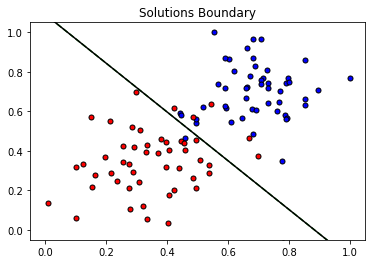

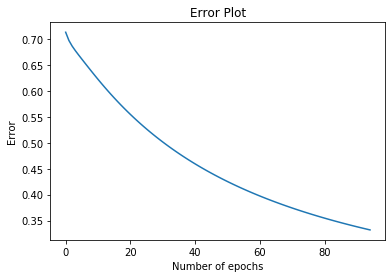

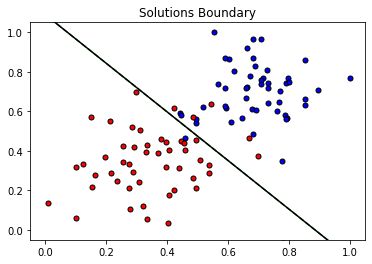

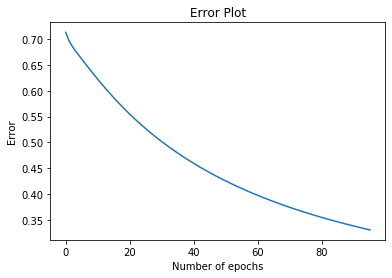

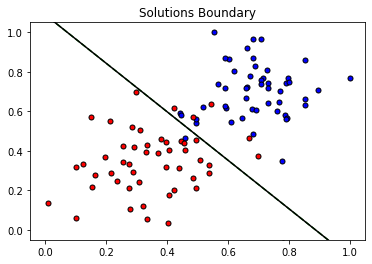

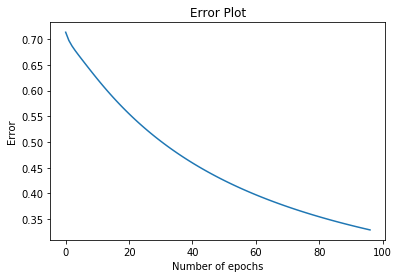

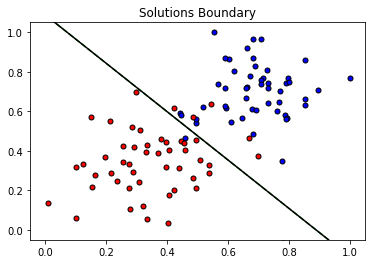

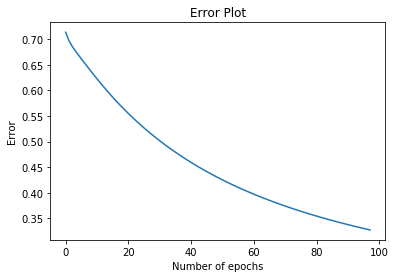

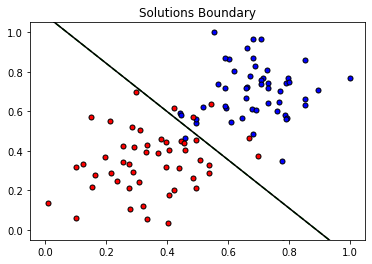

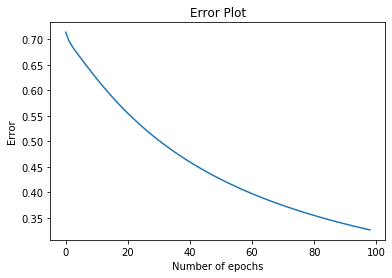

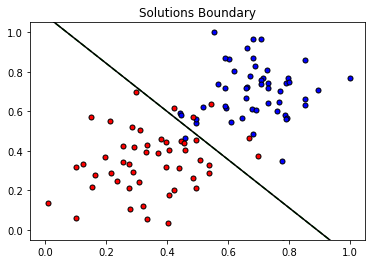

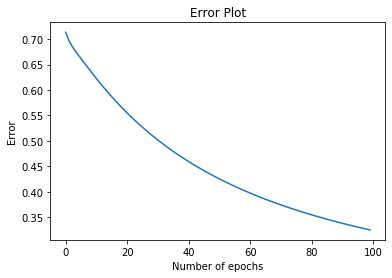

In [19]:
## Train algorithm

train(X, y, epochs, lr, True)